In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-store-sample-database/products.csv
/kaggle/input/bike-store-sample-database/brands.csv
/kaggle/input/bike-store-sample-database/categories.csv
/kaggle/input/bike-store-sample-database/order_items.csv
/kaggle/input/bike-store-sample-database/staffs.csv
/kaggle/input/bike-store-sample-database/orders.csv
/kaggle/input/bike-store-sample-database/stores.csv
/kaggle/input/bike-store-sample-database/customers.csv
/kaggle/input/bike-store-sample-database/stocks.csv


In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Read in CSV files
brands = pd.read_csv('/kaggle/input/bike-store-sample-database/brands.csv')
categories = pd.read_csv('/kaggle/input/bike-store-sample-database/categories.csv')
customers = pd.read_csv('/kaggle/input/bike-store-sample-database/customers.csv')
order_items = pd.read_csv('/kaggle/input/bike-store-sample-database/order_items.csv')
orders = pd.read_csv('/kaggle/input/bike-store-sample-database/orders.csv')
products = pd.read_csv('/kaggle/input/bike-store-sample-database/products.csv')
staffs = pd.read_csv('/kaggle/input/bike-store-sample-database/staffs.csv')
stocks = pd.read_csv('/kaggle/input/bike-store-sample-database/stocks.csv')
stores = pd.read_csv('/kaggle/input/bike-store-sample-database/stores.csv')

In [5]:
# Create database connection
connection = sqlite3.connect('bike_store.db')

In [6]:

# Insert data into database
brands.to_sql('brands', connection, if_exists='replace', index=False)
categories.to_sql('categories', connection, if_exists='replace', index=False)
customers.to_sql('customers', connection, if_exists='replace', index=False)
order_items.to_sql('order_items', connection, if_exists='replace', index=False)
orders.to_sql('orders', connection, if_exists='replace', index=False)
products.to_sql('products', connection, if_exists='replace', index=False)
staffs.to_sql('staffs', connection, if_exists='replace', index=False)
stocks.to_sql('stocks', connection, if_exists='replace', index=False)
stores.to_sql('stores', connection, if_exists='replace', index=False)

3

#### DATA DIAGRAM

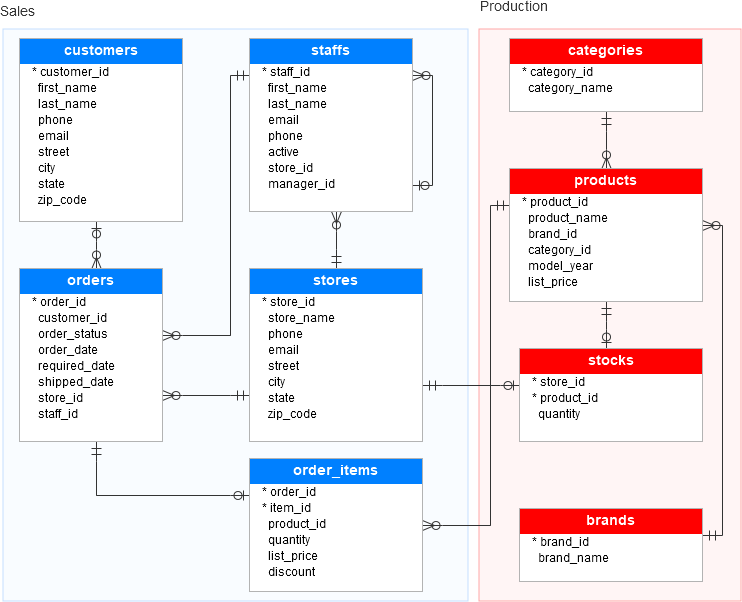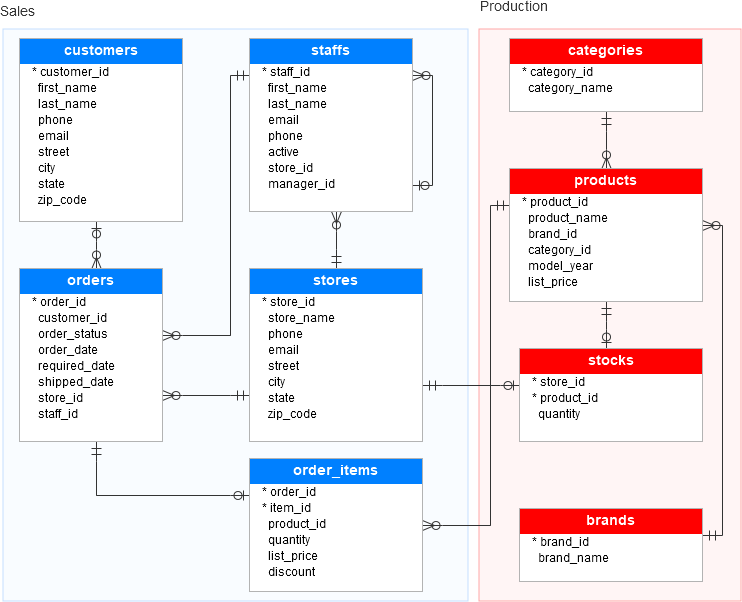

SELECT & FROM
SELECT and FROM are the 2 minimum components we need to build a query in SQL. SELECT defines what columns we would like, and FROM defines the table we would like to pull data from.

In [7]:
# Run SQL query and load results into a DataFrame
query = """
SELECT 
    category_name 
FROM 
    categories;
"""

df = pd.read_sql_query(query, connection)
df

,category_name
0,Children Bicycles
1,Comfort Bicycles
2,Cruisers Bicycles
3,Cyclocross Bicycles
4,Electric Bikes
5,Mountain Bikes
6,Road Bikes


In [8]:
query = """
SELECT 
    * 
FROM 
    categories;
"""

df = pd.read_sql_query(query, connection)
df

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [9]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
ORDER BY
    last_name;
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Jamika,Acevedo
1,Penny,Acevedo
2,Ester,Acevedo
3,Shery,Acosta
4,Bettyann,Acosta
...,...,...
1440,Edda,Young
1441,Jasmin,Young
1442,Jayme,Zamora
1443,Alexandria,Zamora


In [10]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
ORDER BY
    last_name, first_name;
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Ester,Acevedo
1,Jamika,Acevedo
2,Penny,Acevedo
3,Bettyann,Acosta
4,Shery,Acosta
...,...,...
1440,Edda,Young
1441,Jasmin,Young
1442,Alexandria,Zamora
1443,Jayme,Zamora


In [11]:
query = """
SELECT 
    DISTINCT
    last_name
FROM 
    customers
ORDER BY 
    last_name DESC;
"""

df = pd.read_sql_query(query, connection)
df

,last_name
0,Zimmerman
1,Zamora
2,Young
3,Yates
4,Yang
...,...
748,Aguilar
749,Adkins
750,Adams
751,Acosta


In [12]:
query = """
SELECT 
    DISTINCT
    last_name
FROM 
    customers
ORDER BY 
    last_name ASC
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,last_name
0,Acevedo
1,Acosta
2,Adams
3,Adkins
4,Aguilar


In [13]:
query = """
SELECT 
    first_name , 
    last_name
FROM 
    customers
where 
    last_name = 'Acevedo'
ORDER BY 
    first_name;
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Ester,Acevedo
1,Jamika,Acevedo
2,Penny,Acevedo


In [14]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
WHERE
    last_name = 'Acevedo'
AND
    first_name = 'Ester';
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Ester,Acevedo


In [15]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
WHERE
    last_name = 'Acevedo'
AND
    first_name = 'Ester'
OR
    first_name = 'Jamika';
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Jamika,Acevedo
1,Jamika,Blanchard
2,Ester,Acevedo


In [16]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
WHERE
    last_name = 'Acevedo'
AND
    (
    (first_name = 'Ester')
    OR 
    (first_name = 'Jamika')
    );
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Jamika,Acevedo
1,Ester,Acevedo


In [17]:
query = """
SELECT 
    *
FROM 
    customers
WHERE
    state IN ('CA', 'NY')
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820


In [18]:
query = """
SELECT 
    *
FROM 
    customers
WHERE
    state IN ('CA', 'NY')
AND 
    phone IS NULL
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,6,Lyndsey,Bean,None,lyndsey.bean@hotmail.com,769 West Road,Fairport,NY,14450


In [19]:
query = """
SELECT 
    *
FROM 
    customers
WHERE
    state IN ('CA', 'NY')
AND 
    phone IS NOT NULL
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820
1,7,Latasha,Hays,(716) 986-3359,latasha.hays@hotmail.com,7014 Manor Station Rd.,Buffalo,NY,14215
2,12,Robby,Sykes,(516) 583-7761,robby.sykes@hotmail.com,486 Rock Maple Street,Hempstead,NY,11550
3,16,Emmitt,Sanchez,(212) 945-8823,emmitt.sanchez@hotmail.com,461 Squaw Creek Road,New York,NY,10002
4,26,Theo,Reese,(562) 215-2907,theo.reese@gmail.com,8755 W. Wild Horse St.,Long Beach,NY,11561


In [20]:
query = """
SELECT 
    *
FROM 
    products
WHERE
    product_name LIKE 'T%'
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
2,7,Trek Slash 8 27.5 - 2016,9,6,2016,3999.99
3,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016,1799.99
4,9,Trek Conduit+ - 2016,9,5,2016,2999.99


In [21]:
query = """
SELECT 
    *,
    MAX(list_price)
FROM 
    order_items;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,item_id,product_id,quantity,list_price,discount,MAX(list_price)
0,1364,2,155,2,11999.99,0.1,11999.99


In [22]:
query = """
SELECT 
    SUM(quantity) AS total_items_ordered
FROM 
    order_items;
"""

df = pd.read_sql_query(query, connection)
df

,total_items_ordered
0,7078


In [23]:
query = """
SELECT 
    AVG(list_price * discount) AS avg_discount_usd
FROM 
    order_items;
"""

df = pd.read_sql_query(query, connection)
df

,avg_discount_usd
0,126.698149


In [24]:
query = """
SELECT 
    ROUND(AVG(list_price * (1 - discount)), 2) AS avg_saleprice_usd
FROM 
    order_items
WHERE
    list_price >= 1000;
"""

df = pd.read_sql_query(query, connection)
df

,avg_saleprice_usd
0,2542.02


In [25]:
query = """
SELECT 
    order_id,
    ROUND(SUM(quantity * list_price * (1 - discount)), 2) final_sale_price
FROM 
    order_items
GROUP BY
    order_id;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,final_sale_price
0,1,10231.05
1,2,1697.97
2,3,1519.98
3,4,1349.98
4,5,3900.06
...,...,...
1610,1611,8963.96
1611,1612,3781.13
1612,1613,5257.97
1613,1614,6104.04


In [26]:
query = """
SELECT 
    order_id,
    ROUND(SUM(quantity * list_price * (1 - discount)), 2) final_sale_price
FROM 
    order_items
GROUP BY
    1
HAVING
    final_sale_price > 20000
ORDER BY
    2 DESC;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,final_sale_price
0,1541,29147.03
1,937,27050.72
2,1506,25574.96
3,1482,25365.43
4,1364,24890.62
5,930,24607.03
6,1348,20648.95
7,1334,20509.43
8,973,20177.75


In [27]:
query = """
SELECT 
    *,
    CASE WHEN shipped_date > required_date THEN 1
         ELSE 0
         END AS 'shipped_late'
FROM 
    orders
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,shipped_late
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,0
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6,0
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7,0
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3,1
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6,0


In [28]:
query = """
SELECT 
    order_id,
    CAST(order_id AS float) AS order_id_float
FROM 
    orders
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,order_id_float
0,1,1.0
1,2,2.0
2,3,3.0
3,4,4.0
4,5,5.0


In [29]:
query = """
SELECT 
    *
FROM 
    orders
INNER JOIN
    customers
ON
    orders.customer_id = customers.customer_id
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,259,Johnathan,Velazquez,None,johnathan.velazquez@hotmail.com,9680 E. Somerset Street,Pleasanton,CA,94566
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6,1212,Jaqueline,Cummings,None,jaqueline.cummings@hotmail.com,478 Wrangler St.,Huntington Station,NY,11746
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7,523,Joshua,Robertson,None,joshua.robertson@gmail.com,81 Campfire Court,Patchogue,NY,11772
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3,175,Nova,Hess,None,nova.hess@msn.com,773 South Lafayette St.,Duarte,CA,91010
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6,1324,Arla,Ellis,None,arla.ellis@yahoo.com,127 Crescent Ave.,Utica,NY,13501


In [30]:
query = """
SELECT 
    *
FROM 
    orders
LEFT JOIN
    customers
ON
    orders.customer_id = customers.customer_id
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,259,Johnathan,Velazquez,None,johnathan.velazquez@hotmail.com,9680 E. Somerset Street,Pleasanton,CA,94566
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6,1212,Jaqueline,Cummings,None,jaqueline.cummings@hotmail.com,478 Wrangler St.,Huntington Station,NY,11746
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7,523,Joshua,Robertson,None,joshua.robertson@gmail.com,81 Campfire Court,Patchogue,NY,11772
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3,175,Nova,Hess,None,nova.hess@msn.com,773 South Lafayette St.,Duarte,CA,91010
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6,1324,Arla,Ellis,None,arla.ellis@yahoo.com,127 Crescent Ave.,Utica,NY,13501


In [33]:
query = """
SELECT 
    *
FROM 
    orders
left  JOIN
    customers
ON
    orders.customer_id = customers.customer_id
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,259,Johnathan,Velazquez,None,johnathan.velazquez@hotmail.com,9680 E. Somerset Street,Pleasanton,CA,94566
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6,1212,Jaqueline,Cummings,None,jaqueline.cummings@hotmail.com,478 Wrangler St.,Huntington Station,NY,11746
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7,523,Joshua,Robertson,None,joshua.robertson@gmail.com,81 Campfire Court,Patchogue,NY,11772
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3,175,Nova,Hess,None,nova.hess@msn.com,773 South Lafayette St.,Duarte,CA,91010
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6,1324,Arla,Ellis,None,arla.ellis@yahoo.com,127 Crescent Ave.,Utica,NY,13501


In [34]:
query = """
SELECT 
    t1.customer_id,
    MAX(t1.order_date) most_recent_order,
    MAX(t2.order_date) second_most_recent_order
FROM 
    orders t1
INNER JOIN
    orders t2
ON 
    t1.customer_id = t2.customer_id
AND
    t1.order_date > t2.order_date
GROUP BY
    1;
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,most_recent_order,second_most_recent_order
0,1,2018-11-18,2018-04-18
1,2,2018-04-09,2017-08-21
2,3,2018-10-21,2018-04-06
3,4,2018-04-18,2017-11-21
4,5,2018-04-17,2016-11-24
...,...,...,...
126,231,2018-04-26,2017-12-14
127,233,2018-04-13,2017-06-03
128,237,2018-04-08,2016-04-11
129,239,2018-04-29,2017-08-09


In [35]:
query = """
SELECT 
    product_id,
    product_name,
    model_year,
    list_price
FROM 
    products
WHERE
    model_year = 2016
UNION
SELECT 
    product_id,
    product_name,
    model_year,
    list_price
FROM 
    products
WHERE
    model_year = 2019;
"""

df = pd.read_sql_query(query, connection)
df

,product_id,product_name,model_year,list_price
0,1,Trek 820 - 2016,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,2016,749.99
2,3,Surly Wednesday Frameset - 2016,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,2016,1320.99
5,6,Surly Ice Cream Truck Frameset - 2016,2016,469.99
6,7,Trek Slash 8 27.5 - 2016,2016,3999.99
7,8,Trek Remedy 29 Carbon Frameset - 2016,2016,1799.99
8,9,Trek Conduit+ - 2016,2016,2999.99
9,10,Surly Straggler - 2016,2016,1549.00


In [36]:
query = """
SELECT 
    *
FROM 
    products
WHERE
    model_year = 2019
AND
    list_price > (
                  SELECT
                      AVG(list_price)
                  FROM
                      products
                  WHERE
                      model_year = 2019
                 );
"""

df = pd.read_sql_query(query, connection)
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
1,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99
2,321,Trek Checkpoint ALR Frameset - 2019,9,7,2019,3199.99


In [37]:
query = """
SELECT 
    DISTINCT
    order_id,
    customer_id
FROM 
    orders
WHERE
    order_id IN (
                  SELECT
                      DISTINCT
                      order_id
                  FROM
                      order_items
                  INNER JOIN
                      products
                  ON
                      order_items.product_id = products.product_id
                  AND
                      brand_id = 9
                  AND
                      discount >= .20
                 );
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id
0,1,259
1,16,552
2,19,696
3,28,252
4,29,437
...,...,...
293,1601,43
294,1602,55
295,1605,123
296,1610,15


In [38]:
query = """
SELECT 
    DISTINCT
    order_id,
    customer_id
FROM 
    orders
WHERE
    EXISTS (
            SELECT
                1
            FROM
                order_items
            WHERE
                discount >= .20
            AND
                order_items.order_id = orders.order_id
            );
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id
0,1,259
1,11,1326
2,15,450
3,16,552
4,17,1175
...,...,...
855,1610,15
856,1611,6
857,1612,3
858,1614,135


In [39]:
query = """
WITH category_sales AS (
    SELECT
        DISTINCT
        order_id,
        order_items.product_id,
        quantity,
        order_items.list_price,
        quantity * order_items.list_price AS line_subtotal,
        category_id
    FROM
        order_items
    INNER JOIN
        products
    ON
        order_items.product_id = products.product_id
        
)

SELECT
    category_id,
    SUM(line_subtotal) AS revenue,
    SUM(quantity) AS units_sold,
    COUNT(DISTINCT order_id) AS total_orders
FROM 
    category_sales
GROUP BY
    1
ORDER BY
    2 DESC;
"""

df = pd.read_sql_query(query, connection)
df

,category_id,revenue,units_sold,total_orders
0,6,3030775.71,1755,866
1,7,1852555.60,559,315
2,3,1109151.04,2063,959
3,5,1020236.85,315,202
4,4,799874.60,394,245
5,2,438506.87,813,472
6,1,327888.21,1179,635


In [40]:
query = """
WITH RECURSIVE employee_hierarchy AS (
    SELECT
        staff_id,
        manager_id,
        first_name || ' ' || last_name AS full_name
    FROM
        staffs t1
    WHERE
        manager_id IS NULL
    UNION ALL
    SELECT
        t2.staff_id,
        t2.manager_id,
        t2.first_name || ' ' || t2.last_name AS full_name
    FROM
        staffs t2
    INNER JOIN
        employee_hierarchy eh
    ON
        t2.manager_id = eh.staff_id  
)

SELECT
    *
FROM
    employee_hierarchy;
"""

df = pd.read_sql_query(query, connection)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,staff_id,manager_id,full_name
0,1,NaN,Fabiola Jackson
1,2,1.0,Mireya Copeland
2,5,1.0,Jannette David
3,8,1.0,Kali Vargas
4,3,2.0,Genna Serrano
5,4,2.0,Virgie Wiggins
6,6,5.0,Marcelene Boyer
7,7,5.0,Venita Daniel
8,9,7.0,Layla Terrell
9,10,7.0,Bernardine Houston


In [41]:
query = """
WITH daily_orders AS (
    SELECT
        order_date,
        store_id,
        COUNT(*) AS orders
    FROM
        orders
    GROUP BY
        1,2
)

SELECT
    order_date,
    store_id,
    AVG(orders) OVER(PARTITION BY store_id 
                     ORDER BY order_date ASC
                     ROWS BETWEEN 14 PRECEDING AND 15 FOLLOWING) AS moving_avg_30d
FROM
    daily_orders;
"""

df = pd.read_sql_query(query, connection)
df

,order_date,store_id,moving_avg_30d
0,2016-01-01,1,1.250000
1,2016-01-03,1,1.235294
2,2016-01-05,1,1.222222
3,2016-01-06,1,1.210526
4,2016-01-09,1,1.200000
...,...,...,...
1049,2018-04-29,3,1.210526
1050,2018-07-01,3,1.222222
1051,2018-07-10,3,1.235294
1052,2018-11-28,3,1.187500


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

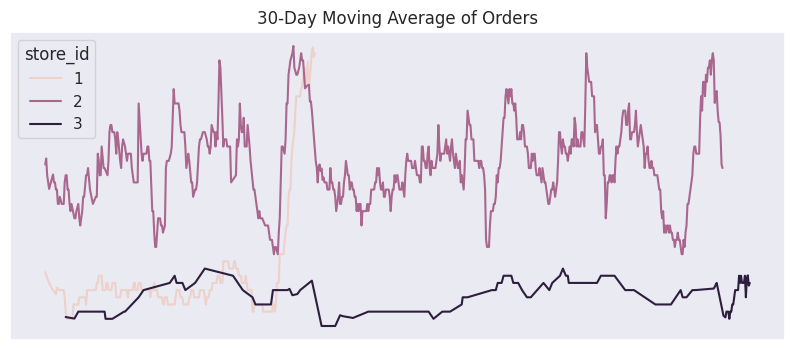

In [42]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=df, x='order_date', y='moving_avg_30d', hue='store_id', ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('30-Day Moving Average of Orders')
plt.show()

In [43]:
query = """
WITH customer_stats AS (
    SELECT
        customer_id,
        SUM(quantity * list_price * (1 - discount)) AS total_spent,
        COUNT(DISTINCT orders.order_id) AS total_orders,
        julianday('2018-12-29') - julianday(MAX(order_date)) AS days_since_last_purchase
    FROM
        orders
    INNER JOIN
        order_items
    ON
        orders.order_id = order_items.order_id
    GROUP BY
        1
)

SELECT
    customer_id,
    CASE WHEN total_orders > 1 THEN 'repeat buyer'
         ELSE 'one-time buyer'
         END AS purchase_frequency,
    CASE WHEN days_since_last_purchase < 90 THEN 'recent buyer'
         ELSE 'not recent buyer'
         END AS purchase_recency,
    CASE WHEN total_spent/(SELECT MAX(total_spent) FROM customer_stats) >= .65 THEN 'big spender'
         WHEN total_spent/(SELECT MAX(total_spent) FROM customer_stats) <= .30 THEN 'low spender'
         ELSE 'average spender' 
         END AS buying_power
FROM
    customer_stats
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,purchase_frequency,purchase_recency,buying_power
0,1,repeat buyer,recent buyer,big spender
1,2,repeat buyer,not recent buyer,average spender
2,3,repeat buyer,recent buyer,big spender
3,4,repeat buyer,not recent buyer,average spender
4,5,repeat buyer,not recent buyer,average spender
...,...,...,...,...
1440,1441,one-time buyer,not recent buyer,low spender
1441,1442,one-time buyer,not recent buyer,low spender
1442,1443,one-time buyer,not recent buyer,low spender
1443,1444,one-time buyer,not recent buyer,low spender


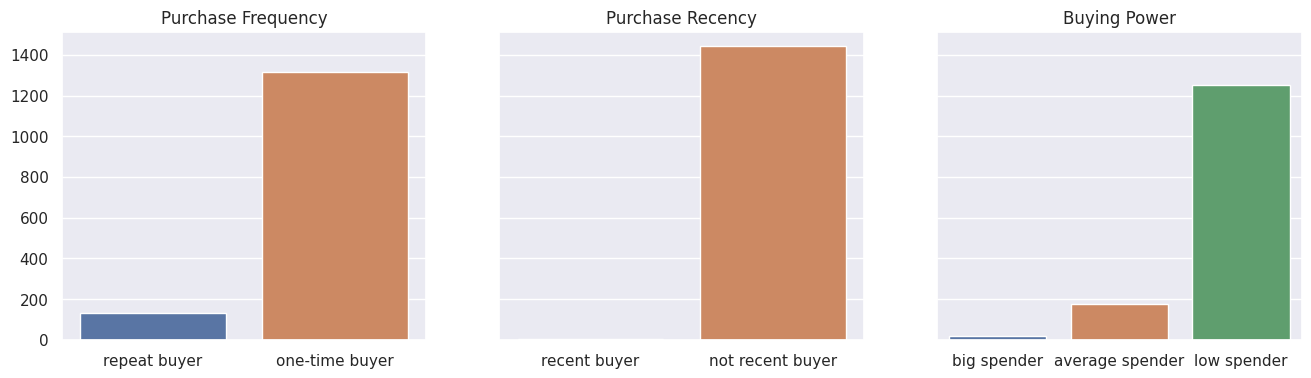

In [44]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4), sharey=True)
sns.countplot(data=df, x='purchase_frequency', ax=ax[0])
sns.countplot(data=df, x='purchase_recency', ax=ax[1])
sns.countplot(data=df, x='buying_power', ax=ax[2])
ax[0].set_title('Purchase Frequency')
ax[1].set_title('Purchase Recency')
ax[2].set_title('Buying Power')
for axis in ax:
    axis.set_ylabel('')
    axis.set_xlabel('')
plt.show()

In [45]:
query = """
WITH product_categories AS (
    SELECT
        product_id,
        category_name
    FROM
        products
    INNER JOIN
        categories
    ON
        products.category_id = categories.category_id
),

product_sales_ym AS (
    SELECT
        strftime('%Y', order_date) AS year,
        strftime('%m', order_date) AS month,
        product_id,
        SUM(quantity) AS units_sold
    FROM
        orders
    INNER JOIN
        order_items
    ON
        orders.order_id = order_items.order_id
    GROUP BY
        1,2,3
)

SELECT
    month,
    category_name,
    AVG(units_sold) AS avg_units_sold
FROM
    product_sales_ym
INNER JOIN
    product_categories
ON
    product_sales_ym.product_id = product_categories.product_id
GROUP BY
    1,2;
"""

df = pd.read_sql_query(query, connection)
df

,month,category_name,avg_units_sold
0,01,Children Bicycles,2.973684
1,01,Comfort Bicycles,2.846154
2,01,Cruisers Bicycles,3.000000
3,01,Cyclocross Bicycles,3.200000
4,01,Electric Bikes,2.733333
...,...,...,...
79,12,Cruisers Bicycles,4.965517
80,12,Cyclocross Bicycles,8.600000
81,12,Electric Bikes,5.750000
82,12,Mountain Bikes,3.461538


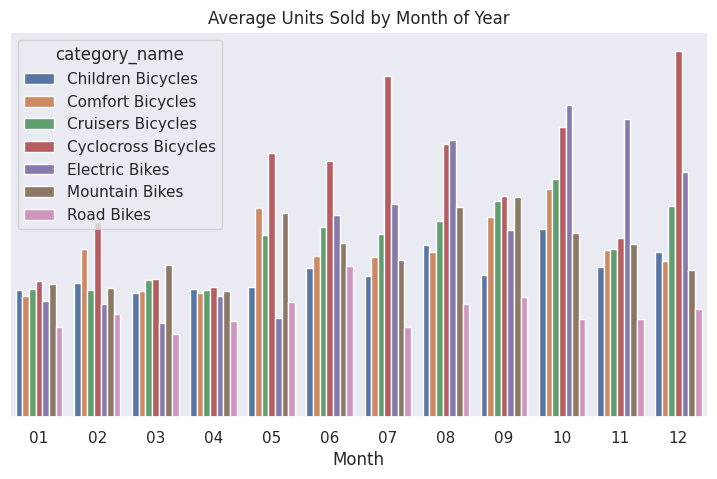

In [46]:
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=df, x='month', y='avg_units_sold', hue='category_name', errorbar=None, ax=ax)
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Month')
ax.set_title('Average Units Sold by Month of Year')
plt.show()

In [47]:
query = """
SELECT
    c.first_name || ' ' || c.last_name AS customer_name,
    COUNT(s.order_id) AS total_transactions,
    RANK() OVER (ORDER BY COUNT(s.order_id) DESC) AS rank
FROM
    orders s
INNER JOIN
    customers c 
ON 
    s.customer_id = c.customer_id
GROUP BY
    1
ORDER BY
    2 DESC;
"""

df = pd.read_sql_query(query, connection)
df

,customer_name,total_transactions,rank
0,Williemae Holloway,3,1
1,Tobie Little,3,1
2,Tameka Fisher,3,1
3,Saturnina Garner,3,1
4,Ronna Butler,3,1
...,...,...,...
1439,Adam Thornton,1,133
1440,Adam Henderson,1,133
1441,Abram Copeland,1,133
1442,Abbey Pugh,1,133


In [48]:
query = """
SELECT
    product_a,
    product_b,
    co_purchase_count
FROM 
    (
     SELECT
         p1.product_name AS product_a,
         p2.product_name AS product_b,
         COUNT(*) AS co_purchase_count
     FROM
         order_items s1
     INNER JOIN
         order_items s2 ON s1.order_id = s2.order_id AND s1.product_id <> s2.product_id
     INNER JOIN
         products p1 ON s1.product_id = p1.product_id
     INNER JOIN
         products p2 ON s2.product_id = p2.product_id
     GROUP BY
         p1.product_id, p2.product_id
    ) subquery
ORDER BY
    co_purchase_count DESC;
"""

df = pd.read_sql_query(query, connection)
df

,product_a,product_b,co_purchase_count
0,Heller Shagamaw Frame - 2016,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,15
1,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,Heller Shagamaw Frame - 2016,15
2,Trek Conduit+ - 2016,Surly Straggler 650b - 2016,14
3,Surly Straggler 650b - 2016,Trek Conduit+ - 2016,14
4,Electra Townie Original 21D - 2016,Electra Cruiser 1 (24-Inch) - 2016,14
...,...,...,...
6923,Electra Townie Original 21D EQ Ladies' - 2018,Trek X-Caliber Frameset - 2018,1
6924,Electra Townie Original 21D Ladies' - 2018,Trek Girl's Kickster - 2017,1
6925,Electra Townie Original 21D Ladies' - 2018,Trek Domane SL 8 Disc - 2018,1
6926,Electra Townie Original 21D Ladies' - 2018,Trek Conduit+ - 2018,1


In [49]:
query = """
SELECT
    customer_id,
    AVG(julianday(order_date) - julianday(prev_order_date)) AS avg_days_between_purchases
FROM 
    (
     SELECT
         c.customer_id,
         order_date,
         LAG(order_date) OVER (PARTITION BY c.customer_id ORDER BY order_date) AS prev_order_date
     FROM
         orders o
    INNER JOIN
         customers c ON o.customer_id = c.customer_id
    ) subquery
WHERE 
    prev_order_date IS NOT NULL
GROUP BY
    1;
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,avg_days_between_purchases
0,1,354.5
1,2,214.0
2,3,104.0
3,4,217.5
4,5,338.0
...,...,...
126,231,133.0
127,233,314.0
128,237,727.0
129,239,263.0
